In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
script_dir = os.path.dirname("HousePrice_prediction")
data_path = os.path.join(script_dir, '../train.csv')
test_path = os.path.join(script_dir, '../test.csv')

In [3]:
df_train = pd.read_csv(data_path)
df_test = pd.read_csv(test_path)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train.isnull().sum().sum()

6965

In [9]:
#Compare columns in df_train and df_test

(df_train.columns.drop('SalePrice') == df_test.columns).any()

True

In [10]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
# drop 'Id' columns from data train dataframe
#axis 0 for index 1 for columns
df_train.drop(["Id"], axis=1, inplace=True)

# drop 'Id' column from test dataframe and save it in (id_test_list) to use it in submission.
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [13]:
num_cols = []
cat_cols = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        num_cols.append(df_train[col].name)
    else:
        cat_cols.append(df_train[col].name)

In [14]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
#sort int or float columns

num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
#filter categorial columns

cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
#Save those into different dataframe

num_trainData = df_train[num_cols]
cat_trainData = df_train[cat_cols]

num_testData = df_test[num_cols[0:-1]]  #salesprice
cat_testData = df_test[cat_cols]

In [18]:
from sklearn.feature_selection import VarianceThreshold
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://scikit-learn.org/stable/modules/feature_selection.html


thresholder = VarianceThreshold(threshold=0.15)   # column where 85% of the values are constant
data_high_variance = thresholder.fit(num_trainData)

In [19]:
thresholder

VarianceThreshold(threshold=0.15)

In [20]:
#get_support 	 Get a mask, or integer index, of the features selected.
#About High Variance : To dealing with overfitting issue
#https://datascience.stackexchange.com/questions/37345/what-is-the-meaning-of-term-variance-in-machine-learning-model

high_variance_list = []
for col in num_trainData.columns:
    if col not in num_trainData.columns[thresholder.get_support()]:
        high_variance_list.append(col)

high_variance_list

['BsmtHalfBath', 'KitchenAbvGr']

In [21]:
df_train.drop(high_variance_list, axis=1, inplace=True)
df_test.drop(high_variance_list, axis=1, inplace=True)

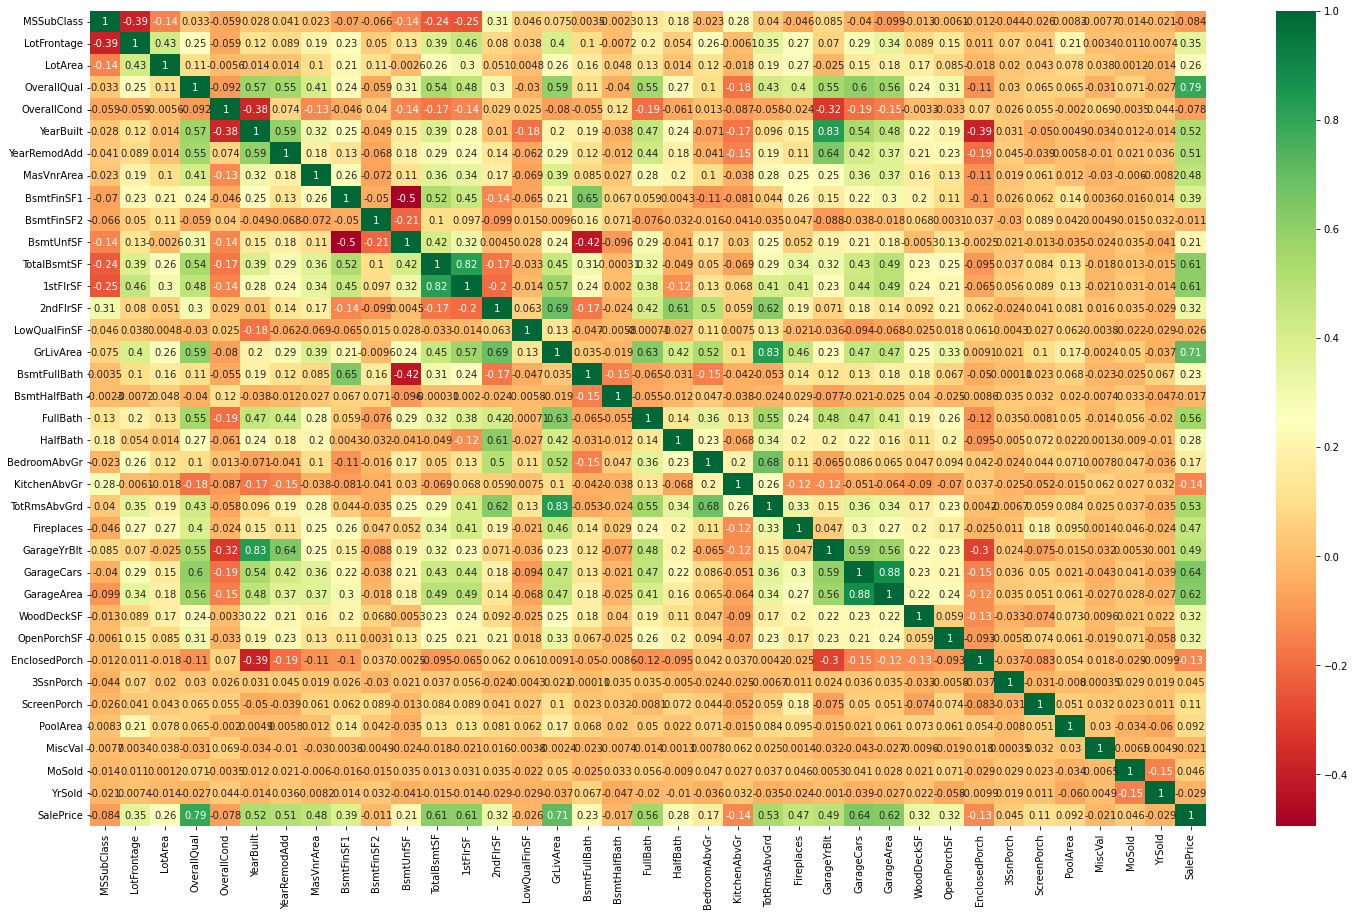

In [22]:
# Get correlation of all the features of the dataset
# About Correlation: https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47
corr_matrix = num_trainData.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(25,15))
g = sns.heatmap(data=num_trainData[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [23]:
#filtering low correlation data lower than 25%
#con1, con2 returns bool values
con1  = num_trainData.corr()['SalePrice'] < 0.25
con2 = num_trainData.corr()['SalePrice'] > -0.25
lowCorr = (num_trainData.corr()[con1 & con2]['SalePrice'].index).to_list()
lowCorr

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [24]:
lowCorr

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [25]:
for i in lowCorr:
    if i in df_train.columns:
        df_train.drop(i, axis=1, inplace=True)
        df_test.drop(i, axis=1, inplace=True)

In [26]:
print('number of duplicate values in df_train dataframe: ',df_train.duplicated().sum())
print('number of duplicate values in df_test dataframe: ',df_test.duplicated().sum())

number of duplicate values in df_train dataframe:  0
number of duplicate values in df_test dataframe:  0


In [27]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [28]:
def drop_missing(df):
    i = 0
    for col in df:
        if (df[col].isnull().sum()/1460) > 0.3:
            df.drop(col, axis=1, inplace=True)
            print('column',col,'is dropped')
            i += 1
    if i == 0:
        print('no column dropped')

In [29]:
drop_missing(df_test)
drop_missing(df_train)

column Alley is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped
column MiscFeature is dropped
column Alley is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped
column MiscFeature is dropped


In [30]:
print(len(df_train.columns))
print(len(df_test.columns))

59
58


In [31]:
def fill_null(df):
    for col in df:
        if (col in num_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print('fillna numerical column: ',col)
        if (col in cat_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna categorical column: ',col)

In [32]:
fill_null(df_train)
fill_null(df_test)

fillna numerical column:  LotFrontage
fillna categorical column:  MasVnrType
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtCond
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna categorical column:  BsmtFinType2
fillna categorical column:  Electrical
fillna categorical column:  GarageType
fillna numerical column:  GarageYrBlt
fillna categorical column:  GarageFinish
fillna categorical column:  GarageQual
fillna categorical column:  GarageCond
fillna categorical column:  MSZoning
fillna numerical column:  LotFrontage
fillna categorical column:  Utilities
fillna categorical column:  Exterior1st
fillna categorical column:  Exterior2nd
fillna categorical column:  MasVnrType
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtCond
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna numerical column:  Bsm

In [33]:
numCol = []
catCol = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numCol.append(df_train[col].name)
    else:
        catCol.append(df_train[col].name)

In [34]:
catCol

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
print(len(df_train.columns))
print(len(df_test.columns))

59
58


Since we received a seperate dataset for the train and test, I'll merge train and test set for the dummydata

In [36]:
dummy=df_train.merge(df_test,how='outer')

C:\Users\hlee0\AppData\Local\Programs\PythonCodingPack\lib\site-packages\pandas\core\reshape\merge.py:1123: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [37]:
train_dummies = pd.get_dummies(dummy[catCol], drop_first=True)
test_dummies = pd.get_dummies(dummy[catCol], drop_first=True)

In [38]:
df_train.drop(catCol, axis=1, inplace=True)
df_test.drop(catCol, axis=1, inplace=True)

In [39]:
train_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2913,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2914,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2915,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
test_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2913,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2914,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2915,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
train_data = df_train.join(train_dummies)
test_data = df_test.join(test_dummies)

In [42]:
train_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,694,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,1978,1988,119.0,790,1542,2073,0,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,1941,2006,0.0,275,1152,1188,1152,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,1950,1996,0.0,49,1078,1078,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'SalePrice'):
        df_train.drop(col, axis=1, inplace=True)
        
for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split 20% proportion for the test set

In [46]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

## Model Prediction

In [47]:
y_pred = lmodel.predict(X_test)
y_pred

array([154336.94764839, 336298.93526645, 115492.00213136, 156257.18981044,
       340990.00190422,  32989.01042062, 221648.59941638, 117458.25735584,
        43262.86329219,  98247.30427859, 143852.17598955, 104875.27667101,
        81447.34615469, 201273.42374533, 176547.55070523, 143146.43448677,
       198224.3407457 , 129724.25741078, 119840.88598828, 228972.20554458,
       180715.10803534, 201261.93357604, 219145.67469669, 118452.88136992,
       215150.75300306, 158212.18337974, 202885.15775911,  86701.84128009,
       164458.26271862, 195514.47150001, 119015.89861205, 273350.49680484,
       207898.28653273,  77455.06094678, 259250.27967231, 152529.93769019,
       146441.03639631, 205944.94861841, 306071.84455015,  57821.36096932,
       100454.09667755, 236871.34643876, 118213.58769387, 316361.65465498,
       135628.07459519, 155331.86821853, 102510.71973215, 132071.63381936,
       377267.97140979, 113521.54288739, 106628.3474151 , 264135.65523809,
       113495.39584797, 2

In [48]:
X_test

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,70.0,8414,6,1963,2003,0.0,663,1059,1068,0,...,0,0,0,0,1,0,0,0,1,0
1105,98.0,12256,8,1994,1995,362.0,1032,1463,1500,1122,...,0,0,0,0,1,0,0,0,1,0
413,56.0,8960,5,1927,1950,0.0,0,1008,1028,0,...,0,0,1,0,0,0,0,0,0,1
522,50.0,5000,6,1947,1950,0.0,399,1004,1004,660,...,0,0,0,0,1,0,0,0,1,0
1036,89.0,12898,9,2007,2008,70.0,1022,1620,1620,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,50.0,5925,4,1937,2000,435.0,168,907,1131,0,...,0,0,0,0,1,0,0,0,1,0
1361,124.0,16158,7,2005,2005,16.0,1274,1530,1530,0,...,0,0,0,0,1,0,0,0,1,0
802,63.0,8199,7,2005,2005,0.0,648,728,728,728,...,0,0,0,0,1,0,0,0,1,0
651,60.0,9084,4,1940,1950,0.0,0,755,755,755,...,0,0,0,0,1,0,0,0,1,0


In [49]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [50]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score 

In [51]:
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("R2 Score : %.2f" %r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 24829.378920511906
Mean Squared Error (MSE): 1409562442.3487115
Root Mean Squared Error (RMSE): 37544.1399202154
R2 Score : 0.82


## What is Mean Absolute Error (MAE)?



Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.

https://www.statisticshowto.com/absolute-error/

## Mean Squared Error (MSE)

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error

Simply put, the lower the value the better and 0 means the model is perfect. 




## Root Mean Squared Error (RMSE)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/

## R2 Score



https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/#:~:text=What%20is%20r2%20score%3F&text=%E2%80%9D%20%E2%80%A6the%20proportion%20of%20the%20variance,with%20no%20variance%20at%20all.


r2 score varies between 0 and 100%. It is closely related to the MSE (see below), but not the same

” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

Another definition is “(total variance explained by model) / total variance.”

So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

https://www.investopedia.com/terms/r/r-squared.asp

So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

# predict test dataframe and submission

In [52]:
# ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature
#(n?,k),(k,m?)->(n?,m?) (size 216 is different from 200). 
#This happens when test data doesn't fit with predict function


In [53]:
subm_preds = lmodel.predict(test_data)
subm_preds

array([113213.64883119, 171661.47753891, 174656.45159613, ...,
       180342.98128046, 108099.75573205, 255670.01177228])

In [54]:
type(test_data)

pandas.core.frame.DataFrame

In [55]:
submission = pd.DataFrame({"Id": id_test_list,"SalePrice": subm_preds})
submission.to_csv('submission.csv', index=False)